In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
import PlaceCellAnalysis as pc
import pickle

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
import logistic_regression

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [40]:
mice = ['4139219.2', '4139219.3', '4139224.2', '4139224.3', '4139224.5',
     '4139251.1','4139251.2','4139260.1','4139260.2','4139261.2','4139266.3','4139265.4',
     '4139265.3','4139265.5']
df = pp.load_session_db()
df = df[df['RewardCount']>20]
df = df[df['Imaging']==1]
df = df[df['ImagingRegion']!='DG']
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]


G:\My Drive\VR_Data\TwoTower\behavior.sqlite


In [34]:
print(df.columns)

Index(['MouseName', 'DateFolder', 'SessionNumber', 'Track', 'RewardCount',
       'Imaging', 'ImagingRegion', 'DateTime', 'data file', 'scanfile',
       'scanmat', 's2pfolder'],
      dtype='object')


In [35]:
tt_mice = ['4139219.2', '4139219.3', '4139224.2', '4139224.3', '4139224.5']
reversal_mice = ['4139251.1','4139260.1','4139261.2']
notask_mice = ['4139260.2','4139266.3','4139265.4','4139265.3','4139265.5']


In [36]:
# sessions 0,1

# session 2

# session 3,4

# remaining sessions

4139260.1
      MouseName  DateFolder  SessionNumber     Track  RewardCount  Imaging  \
1114  4139260.1  23_01_2019              2  Reversal           75        1   
1144  4139260.1  25_01_2019              2  Reversal           83        1   
1176  4139260.1  28_01_2019              2  Reversal           59        1   
1191  4139260.1  29_01_2019              3  Reversal           38        1   
1215  4139260.1  30_01_2019              2  Reversal           42        1   
1239  4139260.1  31_01_2019              2  Reversal           40        1   
1262  4139260.1  01_02_2019              3  Reversal           53        1   
1300  4139260.1  04_02_2019              3  Reversal           47        1   
1335  4139260.1  05_02_2019              2  Reversal           52        1   

     ImagingRegion   DateTime  \
1114           CA1 2019-01-23   
1144           CA1 2019-01-25   
1176           CA1 2019-01-28   
1191           CA1 2019-01-29   
1215           CA1 2019-01-30   
1239       

C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:279: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\cosyne_abstract\logistic_regression.py:131: RuntimeWarning: Mean of empty slice
  c_m0lick[:,n*d_trial_mat.shape[1]:(n+1)*d_trial_mat.shape[1]]=np.nanmean(d_trial_mat[m0_mask,:,:],axis=0).T


MouseName                                                4139260.1
DateFolder                                              29_01_2019
SessionNumber                                                    3
Track                                                     Reversal
RewardCount                                                     38
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2019-01-29 00:00:00
data file        G:\My Drive\VR_Data\TwoTower\4139260.1\29_01_2...
scanfile                                                      None
scanmat          G:\My Drive\2P_Data\TwoTower\4139260.1\29_01_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4139260.1\29_01_2...
Name: 1191, dtype: object
num aberrant ttls 903.0
(28254,) (28254, 21) 62269
frame diff 0
MouseName                                                4139260.1
DateFolder                             

C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:278: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])


MouseName                                                4139260.1
DateFolder                                              31_01_2019
SessionNumber                                                    2
Track                                                     Reversal
RewardCount                                                     40
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2019-01-31 00:00:00
data file        G:\My Drive\VR_Data\TwoTower\4139260.1\31_01_2...
scanfile                                                      None
scanmat          G:\My Drive\2P_Data\TwoTower\4139260.1\31_01_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4139260.1\31_01_2...
Name: 1239, dtype: object
num aberrant ttls 673.0
(28305,) (28305, 21) 97430
frame diff 0
MouseName                                                4139260.1
DateFolder                             

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


MouseName                                                4139261.2
DateFolder                                              04_02_2019
SessionNumber                                                    2
Track                                                     Reversal
RewardCount                                                     35
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2019-02-04 00:00:00
data file        G:\My Drive\VR_Data\TwoTower\4139261.2\04_02_2...
scanfile                                                      None
scanmat          G:\My Drive\2P_Data\TwoTower\4139261.2\04_02_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4139261.2\04_02_2...
Name: 1305, dtype: object
num aberrant ttls 382.0
(18696,) (18696, 21) 60887
frame diff 0
MouseName                                                4139261.2
DateFolder                             

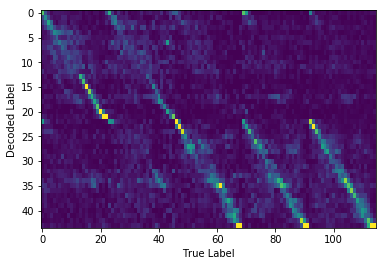

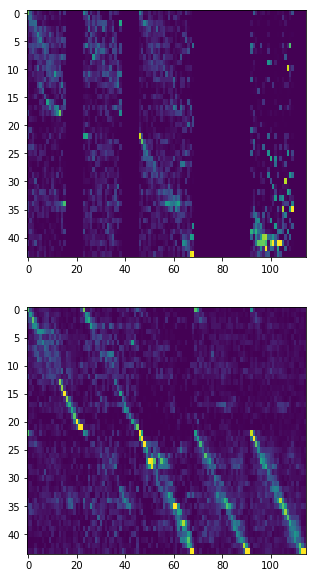

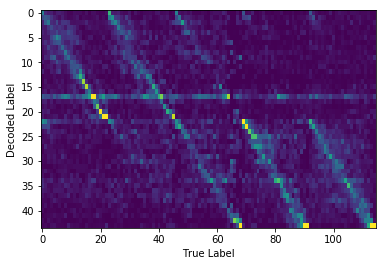

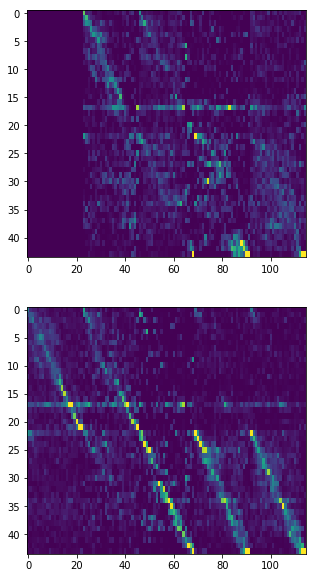

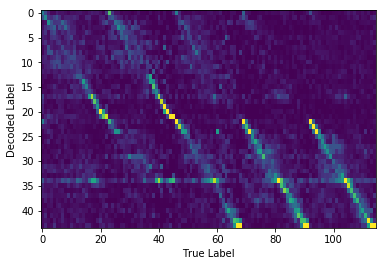

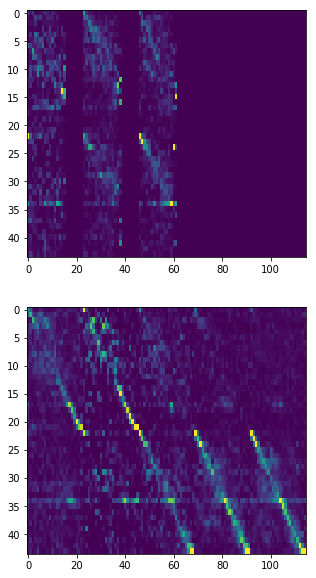

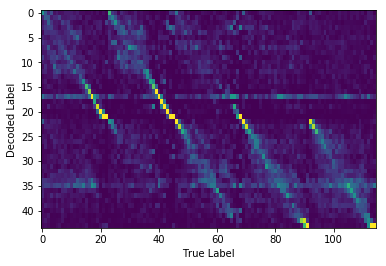

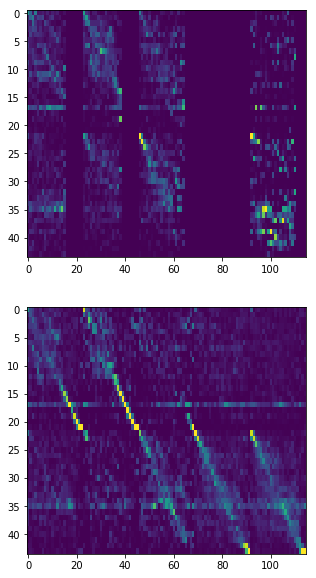

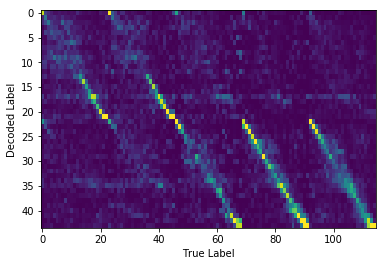

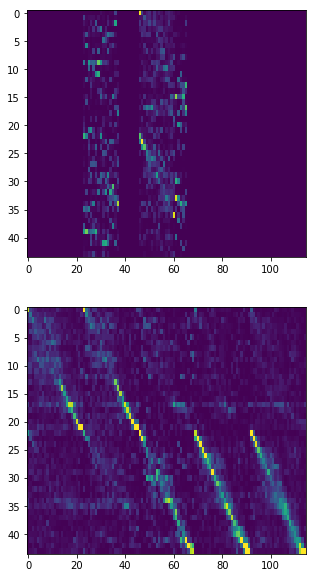

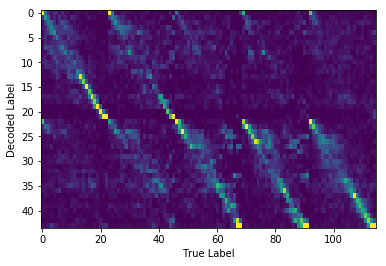

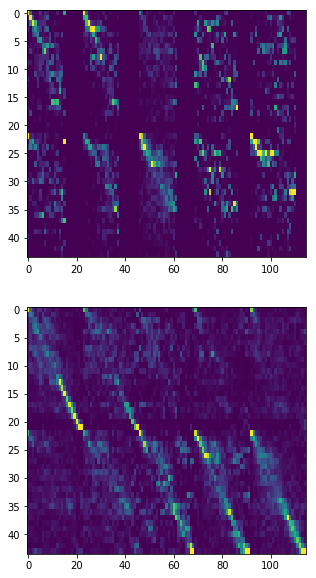

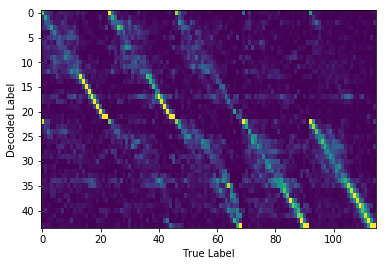

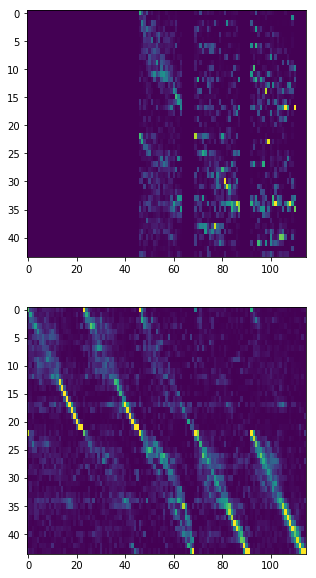

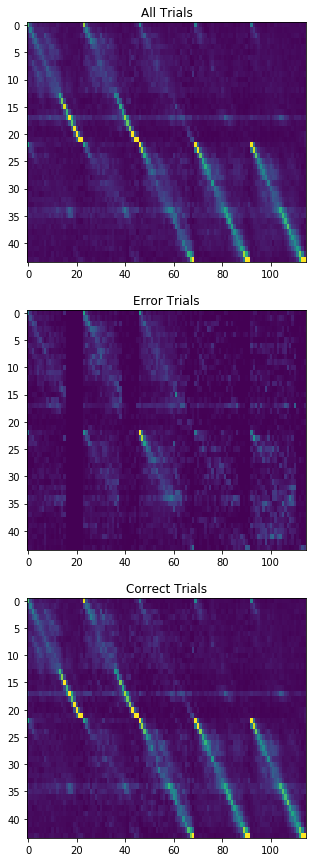

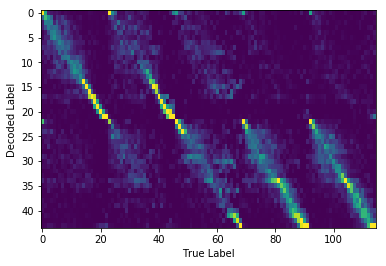

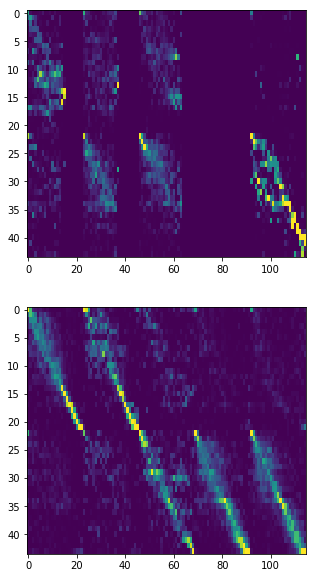

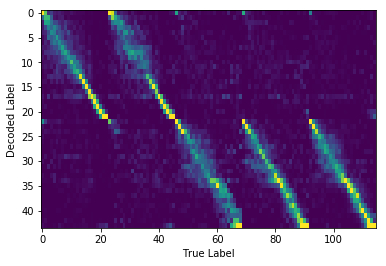

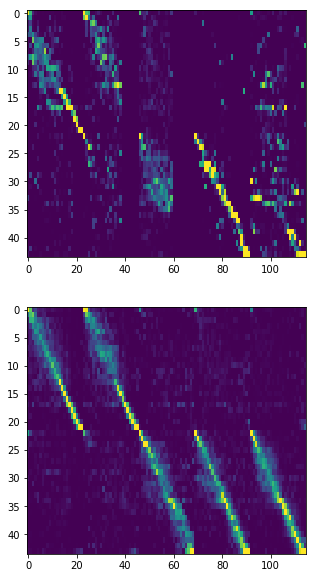

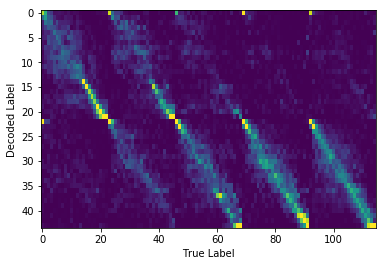

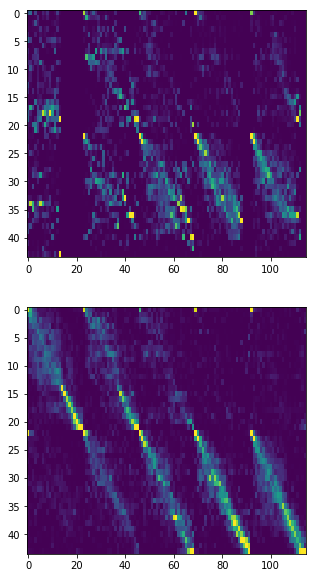

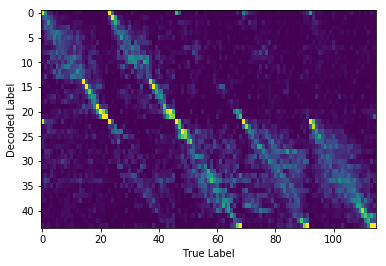

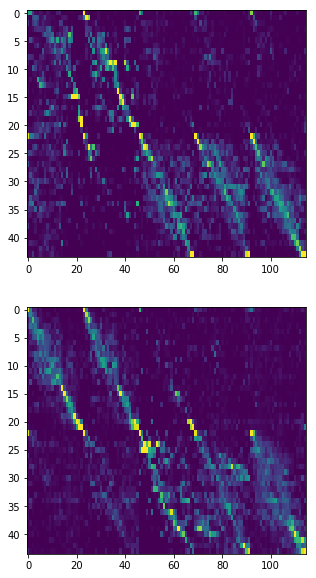

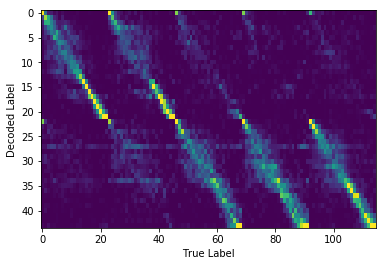

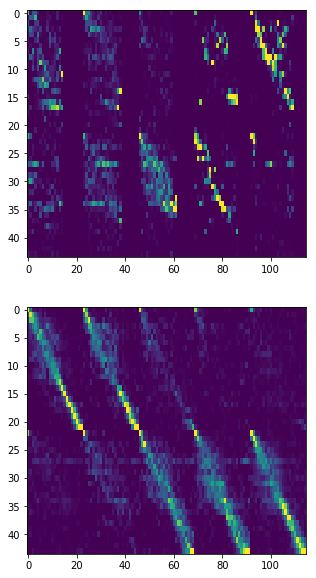

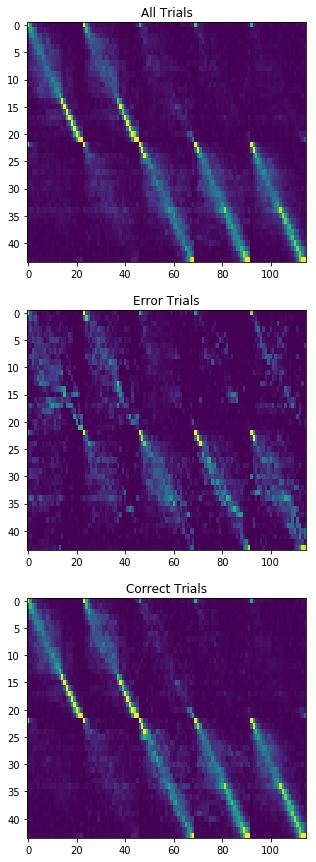

In [41]:

S_list = []
U_list = []
morphs = [0,.25,.5,.75,1]
dirbase = "G:\\My Drive\\Figures\\TwoTower\\COSYNE2019\\CMats"
for m,mouse in enumerate(notask_mice):
    print(mouse)
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_mouse = df_mouse[df_mouse['ImagingRegion'].str.match('CA1')]
    # no timeout 
    mask = df_mouse['Track']=="TwoTower_foraging"
    df_TO = df_mouse[mask]
    print(df_TO)
    
    denom = 0
    for cnt, s in enumerate(range(df_TO.shape[0])):
        sess = df_TO.iloc[s]
        print(sess)
        VRDat,C, S, A = pp.load_scan_sess(sess)
        trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
        S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)
        bin_edges= np.arange(0,451,20)
        bin_edges[-1]=455
        
        fname = os.path.join("G:\\My Drive\\Figures\\TwoTower\\LogReg",mouse,"%s_%d_Xhat.pkl" % (sess['DateFolder'],sess['SessionNumber']))
        with open(fname,"rb") as f:
            d = pickle.load(f)
            Xhat = d['Xhat']
        
        res_dict = {'tstarts': tstart_inds, 'teleports':teleport_inds, 'pos_binned': np.digitize(VRDat.pos._values,bin_edges),
            'Xhat':Xhat,'lick pos':u.lick_positions(VRDat.lick._values,np.digitize(VRDat.pos._values,bin_edges)),
           'morphs':trial_info['morphs'],'rewards':trial_info['rewards'],'pcnt':trial_info['rewards'],
            'omissions':trial_info['omissions'],'pos':VRDat.pos._values}
        
        
        
        c,c_m0,c_m1,(f,ax), (f_pcnt,ax_pcnt) = logistic_regression.confusion_matrix(res_dict,check_pcnt=True,check_omissions=False)
        if cnt == 0:
            C_all = np.copy(c)
            C_m0 = np.copy(c_m0)
            C_m1 = np.copy(c_m1)
        else:
            C_all+=c
            C_m0+=c_m0
            C_m1+=c_m1
            
    C_all/=cnt+1
    C_m0/=cnt+1
    C_m1/=cnt+1
    
    f,ax = plt.subplots(3,1,figsize=[5,15])
    ax[0].imshow(C_all,cmap='viridis',aspect='auto',vmin=0,vmax=.3)
    ax[0].set_title('All Trials')
    ax[1].imshow(C_m0,cmap='viridis',aspect='auto',vmin=0,vmax=.3)
    ax[1].set_title('Error Trials')
    ax[2].imshow(C_m1,cmap='viridis',aspect='auto',vmin=0,vmax=.3)
    ax[2].set_title('Correct Trials')
    figname = os.path.join("G:\\My Drive\\Figures\\TwoTower\\COSYNE2019\\CMats","%s_%s_%d_morphs.pdf" % (mouse,sess['DateFolder'],sess['SessionNumber']))
    f.savefig(figname,format='pdf')
    

4139265.4
      MouseName  DateFolder  SessionNumber              Track  RewardCount  \
1371  4139265.4  07_02_2019              2  TwoTower_foraging           60   
1373  4139265.4  07_02_2019              4  TwoTower_foraging           60   
1407  4139265.4  10_02_2019              2  TwoTower_foraging           60   
1436  4139265.4  12_02_2019              2  TwoTower_foraging           85   
1459  4139265.4  15_02_2019              3  TwoTower_foraging           82   
1478  4139265.4  17_02_2019              2  TwoTower_foraging           94   
1489  4139265.4  18_02_2019              2  TwoTower_foraging          101   
1498  4139265.4  19_02_2019              2  TwoTower_foraging           97   
1510  4139265.4  20_02_2019              2  TwoTower_foraging           99   
1516  4139265.4  21_02_2019              2  TwoTower_foraging           97   
1525  4139265.4  22_02_2019              2  TwoTower_foraging           91   

      Imaging ImagingRegion   DateTime  \
1371       

C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
MouseName                                                4139265.4
DateFolder                                              07_02_2019
SessionNumber                                                    4
Track                                            TwoTower_foraging
RewardCount                                                     60
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2019-02-07 00:00:00
data file        G:\My Drive\VR_Data\TwoTower\4139265.4\07_02_2...
scanfile                                                      None
scanmat          G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...
Name: 1373, dtype: object
num aberrant ttls 0.0
(16060,) (16060, 21) 51653
frame diff 0
MouseName                                                4139265.4
DateFolder                  

C:\Users\mplitt\MightyMorphingPhotonRangers\cosyne_abstract\logistic_regression.py:131: RuntimeWarning: Mean of empty slice
  c_m0lick[:,n*d_trial_mat.shape[1]:(n+1)*d_trial_mat.shape[1]]=np.nanmean(d_trial_mat[m0_mask,:,:],axis=0).T


MouseName                                                4139265.4
DateFolder                                              12_02_2019
SessionNumber                                                    2
Track                                            TwoTower_foraging
RewardCount                                                     85
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2019-02-12 00:00:00
data file        G:\My Drive\VR_Data\TwoTower\4139265.4\12_02_2...
scanfile                                                      None
scanmat          G:\My Drive\2P_Data\TwoTower\4139265.4\12_02_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4139265.4\12_02_2...
Name: 1436, dtype: object
num aberrant ttls 0.0
(24444,) (24444, 21) 81436
frame diff 0
MouseName                                                4139265.4
DateFolder                               

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


MouseName                                                4139265.3
DateFolder                                              22_02_2019
SessionNumber                                                    2
Track                                            TwoTower_foraging
RewardCount                                                     90
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2019-02-22 00:00:00
data file        G:\My Drive\VR_Data\TwoTower\4139265.3\22_02_2...
scanfile                                                      None
scanmat          G:\My Drive\2P_Data\TwoTower\4139265.3\22_02_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4139265.3\22_02_2...
Name: 1522, dtype: object
num aberrant ttls 0.0
(38209,) (38209, 21) 126969
frame diff 0
4139265.5
      MouseName  DateFolder  SessionNumber              Track  RewardCount  \
1410  4139265.5  10

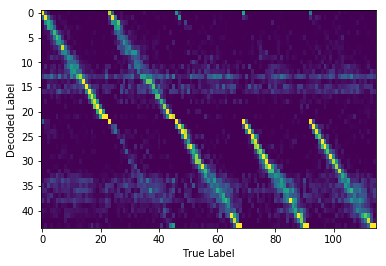

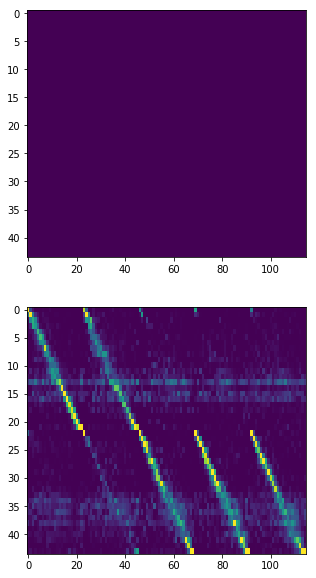

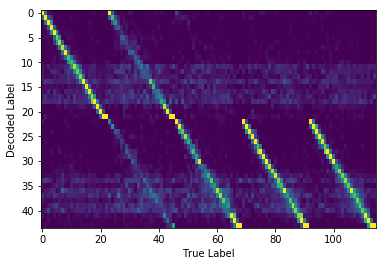

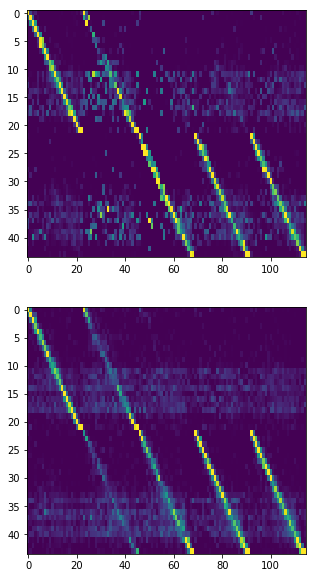

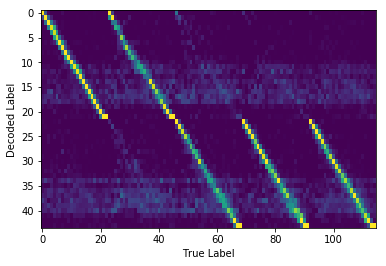

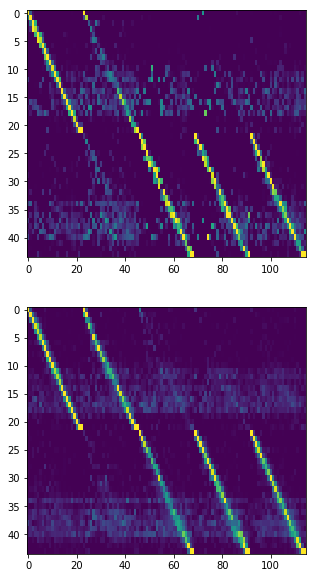

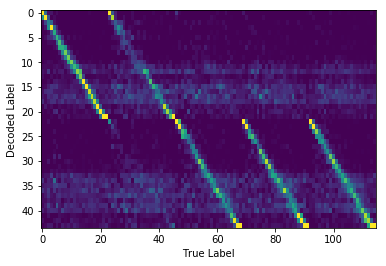

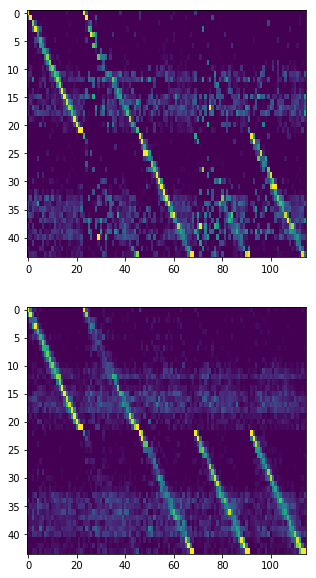

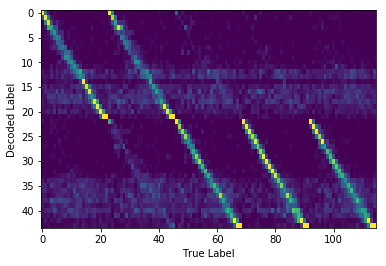

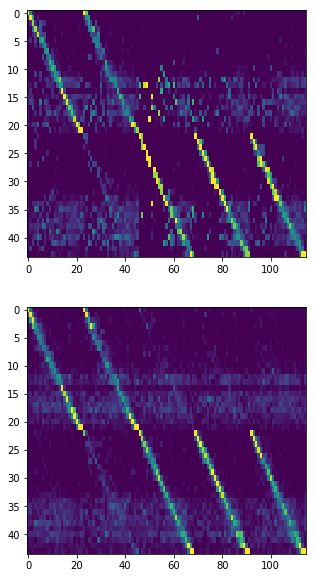

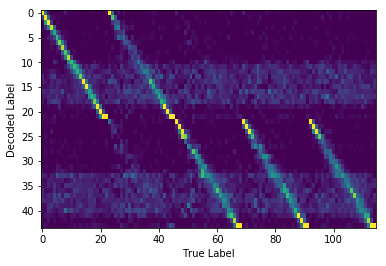

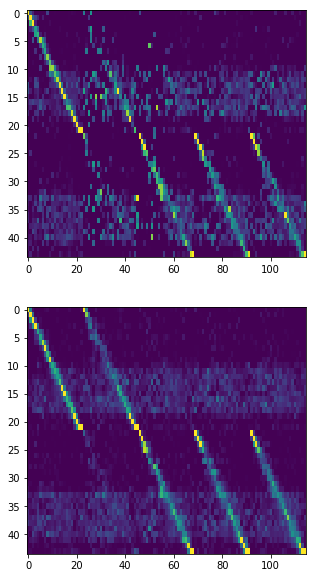

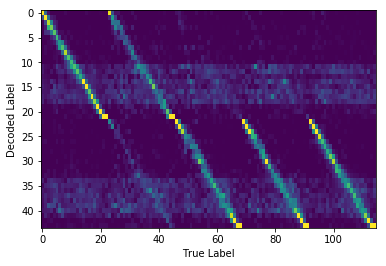

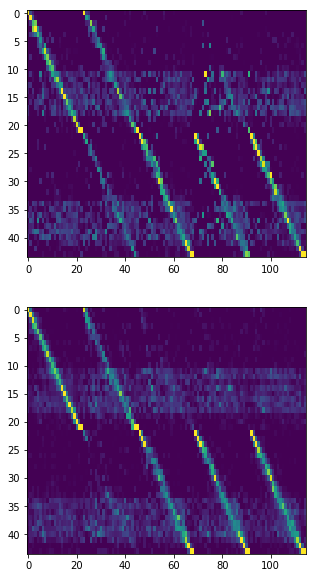

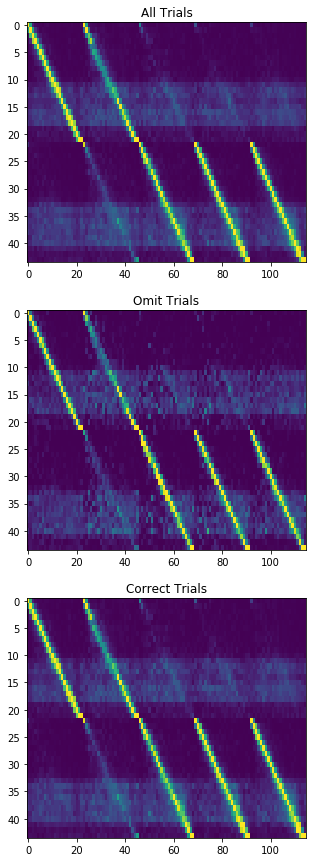

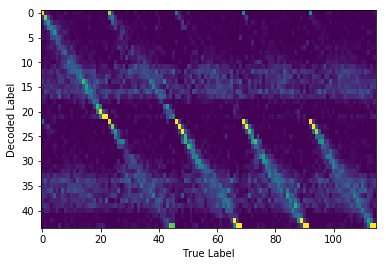

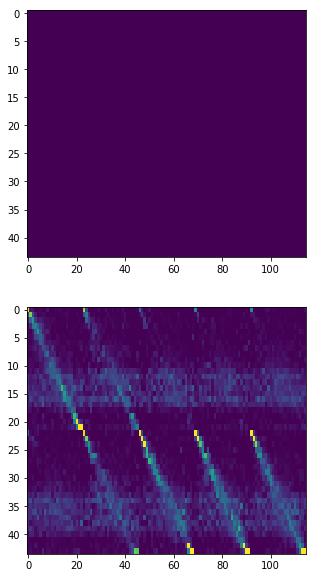

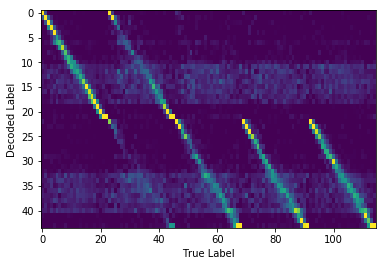

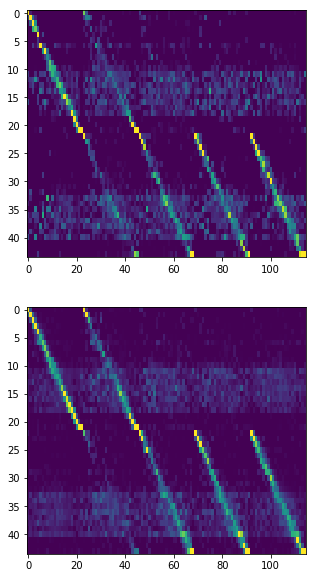

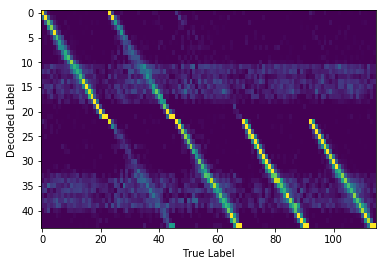

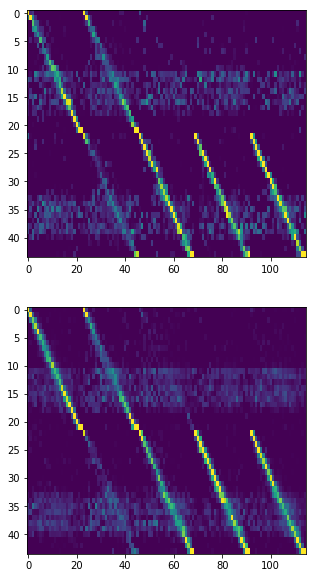

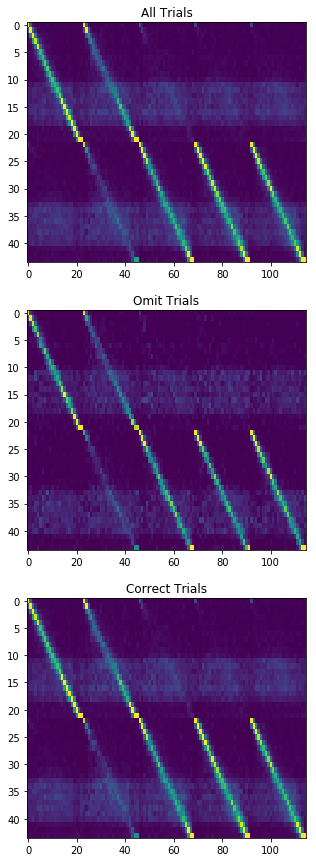

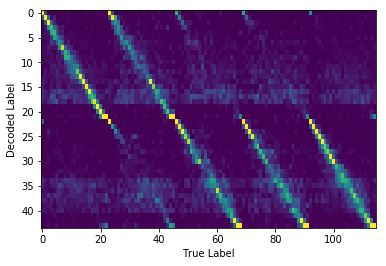

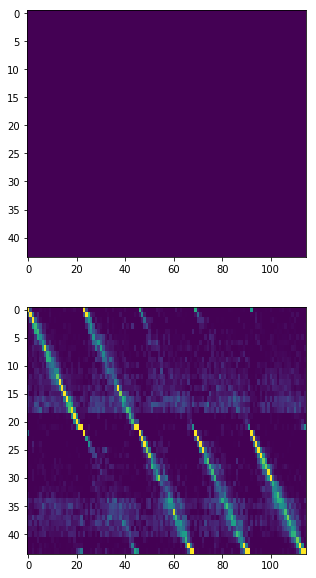

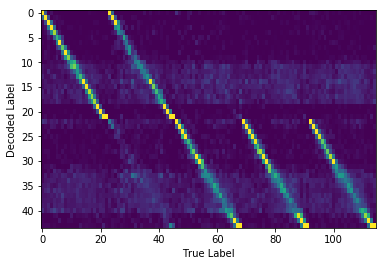

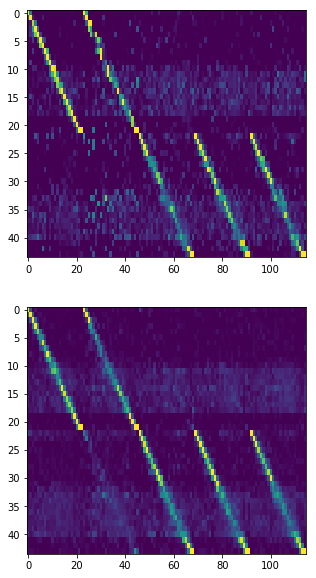

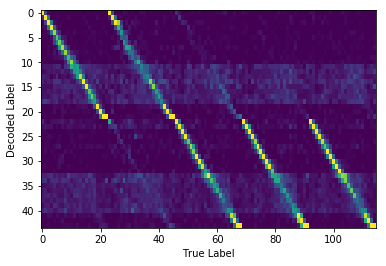

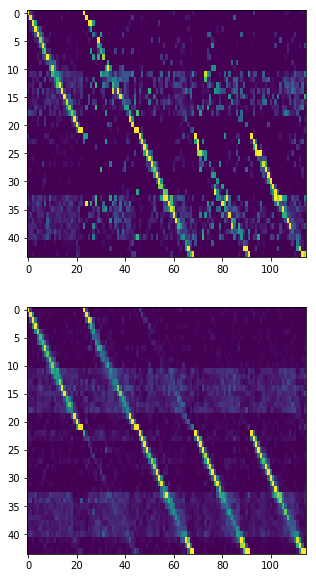

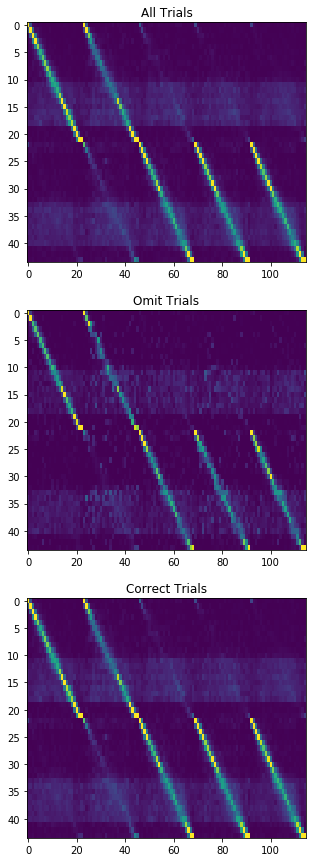

In [45]:
S_list = []
U_list = []
notask_mice = ['4139265.4','4139265.3','4139265.5']
morphs = [0,.25,.5,.75,1]
dirbase = "G:\\My Drive\\Figures\\TwoTower\\COSYNE2019\\CMats"
for m,mouse in enumerate(notask_mice):
    print(mouse)
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_mouse = df_mouse[df_mouse['ImagingRegion'].str.match('CA1')]
    # no timeout 
    mask = df_mouse['Track']=="TwoTower_foraging"
    df_TO = df_mouse[mask]
    print(df_TO)
    
    cnt = 0
    for s in range(df_TO.shape[0]):
        sess = df_TO.iloc[s]
        print(sess)
        VRDat,C, S, A = pp.load_scan_sess(sess)
        trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
        morphs = np.unique(trial_info['morphs'])
        if morphs.shape[0]==5:
            fname = os.path.join("G:\\My Drive\\Figures\\TwoTower\\LogReg",mouse,"%s_%d_Xhat.pkl" % (sess['DateFolder'],sess['SessionNumber']))
            if os.path.isfile(fname):
                cnt+=1
                S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)
                bin_edges= np.arange(0,451,20)
                bin_edges[-1]=455

                with open(fname,"rb") as f:
                    d = pickle.load(f)
                    Xhat = d['Xhat']

                res_dict = {'tstarts': tstart_inds, 'teleports':teleport_inds, 'pos_binned': np.digitize(VRDat.pos._values,bin_edges),
                    'Xhat':Xhat,'lick pos':u.lick_positions(VRDat.lick._values,np.digitize(VRDat.pos._values,bin_edges)),
                   'morphs':trial_info['morphs'],'rewards':trial_info['rewards'],'pcnt':trial_info['rewards'],
                    'omissions':trial_info['omissions'],'pos':VRDat.pos._values}



                c,c_m0,c_m1,(f,ax), (f_pcnt,ax_pcnt) = logistic_regression.confusion_matrix(res_dict,check_pcnt=True,check_omissions=False)
                if cnt == 0:
                    C_all = np.copy(c)
                    C_m0 = np.copy(c_m0)
                    C_m1 = np.copy(c_m1)
                else:
                    C_all+=c
                    C_m0+=c_m0
                    C_m1+=c_m1
            
    C_all/=cnt+1
    C_m0/=cnt+1
    C_m1/=cnt+1
    
    f,ax = plt.subplots(3,1,figsize=[5,15])
    ax[0].imshow(C_all,cmap='viridis',aspect='auto',vmin=0,vmax=.3)
    ax[0].set_title('All Trials')
    ax[1].imshow(C_m0,cmap='viridis',aspect='auto',vmin=0,vmax=.3)
    ax[1].set_title('Omit Trials')
    ax[2].imshow(C_m1,cmap='viridis',aspect='auto',vmin=0,vmax=.3)
    ax[2].set_title('Correct Trials')
    figname = os.path.join("G:\\My Drive\\Figures\\TwoTower\\COSYNE2019\\CMats","%s_%s_%d_morphs.pdf" % (mouse,sess['DateFolder'],sess['SessionNumber']))
    f.savefig(figname,format='pdf')